# Mean-First Passage Times of a Tridiagonal Toeplitz Matrix (i.e. a linear markov chain)

### We assume that our transition matrix is a tridiagonal Toeplitz matrix;

 #### We transform our matrix to the form of ;
 $$ T_{\alpha,\beta}=
\begin{pmatrix}
-\alpha+b & c & 0 & 0\\
a   & b & c & 0\\
0   & a & b & c\\
0   & 0 & a & -\beta+b\\
\end{pmatrix}
$$

 
 ### Drawing from the Eigendecomposition of Tridiagonal matrices presented  by Yueh (https://eudml.org/doc/51497) theorem 5.
 
Where $a = c$, We can use eigenvalues for the case $\alpha = \beta = -\sqrt(ac) = -\sqrt(a^2) = -a$;

$$
\begin{align}
  \lambda_k  &= b +2\sqrt{ac}\ cos\left(\frac{(k-1) \pi}{m}\right); k = 1...m\\
             &= 1-2a +2\sqrt{a^2}\ cos\left(\frac{(k-1) \pi}{m}\right)\\
             &= 1-2a +2a\ cos\left(\frac{(k-1) \pi}{m}\right)
\end{align}
$$

and right eigenvectors $u_j^k$;

$$
\begin{align}
    &\text{for k = 1}\\
    && &u_{j}^{k} = \rho^{j-1}; j=1...n \\
    &\text{and for k = 2...n} \\
    && &u_{j}^{k} = \rho^{j-1} cos(\frac{(k-1)(2j-1)\pi}{2n}); j=1...n \\
    &\text{Where}\\ 
    && &\rho = \sqrt{a/c}
\end{align}
$$

That satisfy the equation $\lambda_j T = \lambda_j u_j$

So for our above Matrix $T_{\alpha,\beta}$, our solutions are;

$$
\begin{align}
    \lambda &= 
    \begin{bmatrix}
        b+2\sqrt{ac} \\ 
        b+\frac{2}{\sqrt{2}}\sqrt{ac} \\ 
        b \\ 
        b-2\sqrt{ac} \\ 
    \end{bmatrix}
\end{align}
$$

with eigenvectors;

$$
\begin{pmatrix}
1      & cos(\frac{\pi}{8})         & cos(\frac{\pi}{4})         & cos(\frac{3\pi}{8})\\
\rho   & \rho\ cos(\frac{3\pi}{8})  & \rho\ cos(\frac{3\pi}{4})  & \rho\ cos(\frac{9\pi}{8})\\
\rho^2 & \rho^2 cos(\frac{5\pi}{8}) & \rho^2 cos(\frac{5\pi}{4}) & \rho^2 cos(\frac{15\pi}{8})\\
\rho^3 & \rho^3 cos(\frac{7\pi}{8}) & \rho^3 cos(\frac{7\pi}{4}) & \rho^3 cos(\frac{21\pi}{8})\\
\end{pmatrix}

Using solutions applied to a birth-death chain by Ugyen Nguyen (https://scholarworks.calstate.edu/downloads/6395w909v)
Where $a = c$, and $a+b+c=1$;

$$ T=
\begin{pmatrix}
a+b & c & 0 & 0\\
a   & b & c & 0\\
0   & a & b & c\\
0   & 0 & a & c+b\\
\end{pmatrix}
$$
Because there are no analytical eigenvectors for an even number of states, we will only consider an odd number of states (# of states defined as pythonic indexing, thus number of states, H, for our example matrix is = 3)

$$
\begin{align}
  \lambda_k  &= b-2\sqrt{ac}\ cos(\theta_k); k = 0...\frac{H-3}{2}\\
             &= b+2\sqrt{ac}\ cos(\theta_k); k = \frac{H-1}{2}...H-2\\
             &= b; k = H-1\\
             &= 1; k = H
\end{align}
$$

where $\theta_k$ is ;

$$
\theta_k = \left\{
\begin{array}{ll}
    \frac{\pi(k+1)}{H+1},& k = 0...\frac{H-3}{2} \\
    \frac{\pi(2k+2-H)}{2(H+1)}^{2},& k = \frac{H-1}{2}...H-2
\end{array}
\right.
$$

and right eigenvectors $u_j^k$;

$$
\begin{align}
    &\text{for k = 0...H-1}\\
    && &u_{1}^{k} = a^{H/2}c^{\frac{H+2}{2}}(a \sin((H+2)\theta_k)+(1-c-\lambda_k) \sin(H\theta_k))\\
    &\text{and for j odd}\\
    && &u_{j}^{k} = a^{\frac{H+j-1}{2}}c^{\frac{H-j+3}{2}}(a \sin((H-j+3)\theta_k)+(1-c-\lambda_k) \sin((H-j+1)\theta_k))\\
    &\text{and for j even}\\
    && &u_{j}^{k} = -a^{\frac{H+j}{2}}c^{\frac{H-j+2}{2}}((1-a-\lambda_k) \sin((H-j+2)\theta_k)+c \sin((H-j)\theta_k))\\
    &\text{and for k=H}\\
    && &u^{H} =(1 \ldots 1)
\end{align}
$$

### From these solutions, we can construct our mean first passage time matrix $H$, composed of elements $h_{ij}$, as described by Howard Levinson in "AN EIGENVALUE REPRESENTATION FOR RANDOM WALK HITTING TIMES AND ITS APPLICATION TO THE ROOK GRAPH"

$$ 
\begin{align}
    && h_{ij} &= E_iT_j\\
    && &= \sum_{k=2}^n \bar{\lambda_k} (u_{jk}^2-u_{ik}u_{jk})\\
    \text{where,}\\
    && h_{ij} &= \frac{z_{ii}-z_{ij}}{\pi_j}\\
    \text{and}\\
    && z_{jj} &= \pi_{j}\left(\sum_{k=1}^n \bar{\lambda_k} u_{jk}^2\right)\\
    && z_{ij} &= \pi_{j}\left(\sum_{k=1}^n \bar{\lambda_k} u_{ik}u_{jk}\right)\\
    &&\bar{\lambda_k} &= (1-\lambda_k)^{-1}\\
\end{align}\\
$$


$$
\large{Citations}\\
\begin{align}
    &\text{(1.) Yueh, W. C. (2005). Eigenvalues of several tridiagonal matrices. Applied Mathematics E-Notes [electronic only], 5, 66-74.}\\
    &\text{(2.)LEVINSON, H. AN EIGENVALUE REPRESENTATION FOR RANDOM WALK HITTING TIMES AND ITS APPLICATION TO THE ROOK GRAPH.}
\end{align}
$$


#### We now test this on an implementation of expanded-ensemble (Wang-Landau) sampling in a simple harmonic bias system

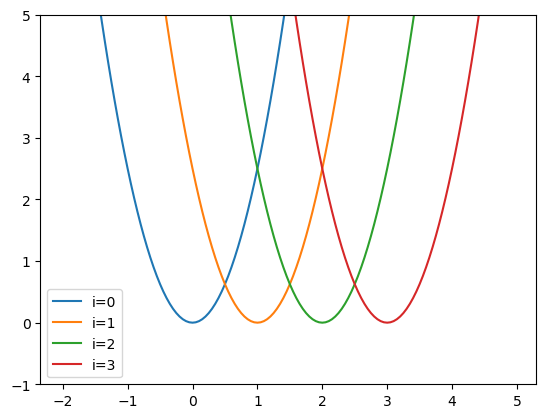

In [458]:
# let's define a number of harmonic potentials
#
#     u_i(x) = 1/2 * k_i (x - x_i)^2
#
# each with a different equilibrium position x_i and force constant k_i

import numpy as np

def u_i(x, k, x0):
    """Returns the (reduced) energy of the harmonic potential in units kT."""
    return 0.5*k*(x-x0)**2

x_i = np.array([0., 1., 2.,3.])   # length (unitless)
k_i = np.array([5.0, 5.0, 5.0,5.0])  # kT/(length)^2
n_ensembles = len(x_i)


# Let's make a plot of these

from matplotlib import pyplot as plt

plt.figure()
xvalues = np.arange(-2,5, 0.05)
for i in range(n_ensembles):
    plt.plot(xvalues, u_i(xvalues, k_i[i], x_i[i]), label='i=%d'%i)
plt.ylim(-1,5)
plt.legend(loc='best')
plt.show()


/home/kpman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  


exp_neg_f = 0.9923035799242266 +/- 9.96328169247505
exp_neg_f_analytical 1.0
f_estimate = 0.007726190364905111 f = -0.0


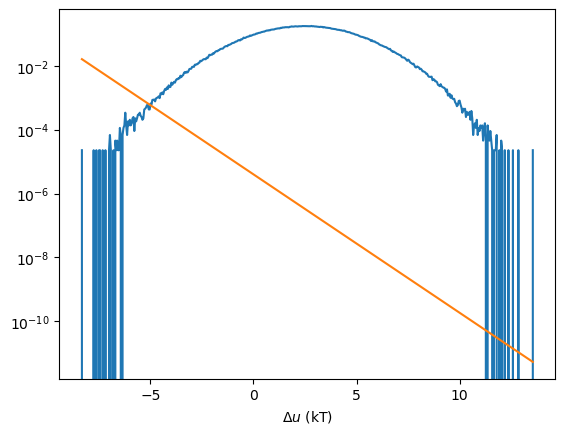

In [700]:
#### Draw a bunch of samples from P_i=2 and compute the corresponding $\Delta_u_{2 \rightarrow 3}*
nsamples = 1000000
x_2_samples = x_i[2] + np.random.randn(nsamples)/(k_i[2]**0.5)
# print('x_2_samples', x_2_samples)
Delta_u_23_samples = u_i(x_2_samples, k_i[3], x_i[3]) -  u_i(x_2_samples, k_i[2], x_i[2])
counts, bin_edges = np.histogram(Delta_u_23_samples, bins=500, normed=True)
bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2.0


plt.figure()
plt.plot(bin_centers, counts)
plt.plot(bin_centers, 4.0e-6*np.exp(-bin_centers), label='$\exp(-\Delta u)$')
#plt.ylim(0.00001,0.03)
plt.yscale('log')
plt.xlabel('$\Delta u$ (kT)')
# compute the average of e^{-\Delta u} = e^{-f}
exp_neg_f = np.mean(np.exp(-1.0*Delta_u_23_samples))
exp_neg_f_std = np.std(np.exp(-1.0*Delta_u_23_samples))
print('exp_neg_f =', exp_neg_f, '+/-', exp_neg_f_std)
exp_neg_f_analytical = (k_i[2]/k_i[3])**0.5
print('exp_neg_f_analytical', exp_neg_f_analytical)
f_estimate = -1.0*np.log(exp_neg_f)
f = -1.0*np.log(exp_neg_f_analytical)
print('f_estimate =', f_estimate, 'f =', f)


In [460]:
# Wang-landau sampling

g = np.zeros(n_ensembles) # bias energies
h = np.zeros(n_ensembles) # histogram counts

wl_increment = 10.0    # in kT
wl_scaling  = 0.8
flatness = 0.95        # if all histogram values are within flatness*100
                       # percent of the mean counts, decr

wl_increment_freq = 10  # frequency to update wl sampling
                        # wl_increment and reset histogram

# random walk
x = 0.0   # initial position
dx = 0.1 # gaussian step size 
i = 0  # thermo index

# status output
print_every = 1000

# trajectory
traj_every = 10
x_traj = []
i_traj = []
step_traj = []
wl_increment_traj = []
free_energy_traj = []
dhdl_traj = []
acceptance = np.zeros(shape=(len(x_i),len(x_i)))
energy = u_i(x, k_i[i], x_i[i])
nsteps = 1000000
for step in range(nsteps):
    
    # propose a MC move
    x_new = x + dx*np.random.randn()
    energy_new = u_i(x_new, k_i[i], x_i[i])
    
    # and accept it according to the metropolis criterion
    accept = False
    P_accept = min(1., np.exp(-(energy_new - energy)))
    if np.random.rand() < P_accept:
        accept = True
    
    if accept:
        x = x_new
        energy = energy_new
    
    
    # update the WL sampling
    if (step%wl_increment_freq == 0):
        
        g[i] += wl_increment
        h[i] += 1.0
        
        # reset the bias to i=0 reference
        g -= g[0]
        
        # attempt a move to a neighboring ensemble
        wl_accept = False
        if np.random.rand() < 0.5:
            j = i+1
        else:
            j = i-1
        
        if (j >= 0) and (j < n_ensembles):
            P_wl_accept = min(1., np.exp(-(u_i(x, k_i[j], x_i[j]) + g[j] - u_i(x, k_i[i], x_i[i]) - g[i])))
            if np.random.rand() < P_wl_accept:
                wl_accept = True    
        if wl_accept:
            acceptance[int(i),int(j)]+=1
            i = j
        else:
            acceptance[int(i),int(i)]+=1

            
            
        # check if the histogram is flat enough
        mean_counts = h.mean()
        
        which_are_flat_enough = (h > flatness*mean_counts)*(h < (2.0-flatness)*mean_counts)
        if step%print_every == 0:
            print('h', h, 'mean_counts', mean_counts)
            print('which_are_flat_enough', which_are_flat_enough)
        
        if np.sum( which_are_flat_enough.astype(int) ) == n_ensembles:
            wl_increment *= wl_scaling
            h = np.zeros(n_ensembles)

    # print a status report
    if step%print_every == 0:
        print('x', x, 'thermo index', i, 'wl_increment =', wl_increment, 'kT')
        print()
        print('# ensemble\thistogram\tg (kT)')
        for k in range(n_ensembles):
            outstr = '%8d\t%8d\t%3.4f'%(k, h[k], g[k])
            if k == i:
                outstr += ' <<'
            print(outstr)

    # store sample in trajectory 
    if step%traj_every == 0:
        x_traj.append(x)
        i_traj.append(i)
        step_traj.append(step)
        free_energy_traj.append(-1.0*g[-1])
        wl_increment_traj.append(wl_increment)

        # store delta energies of all thermo indices 
        dhdl_traj.append( [u_i(x, k_i[j], x_i[j]) - u_i(x, k_i[i], x_i[i]) for j in range(n_ensembles)]  )
acceptance = np.round(acceptance/np.sum(acceptance,axis=0),4)

h [1. 0. 0. 0.] mean_counts 0.25
which_are_flat_enough [False False False False]
x -0.18613745267955295 thermo index 1 wl_increment = 10.0 kT

# ensemble	histogram	g (kT)
       0	       1	0.0000
       1	       0	-10.0000 <<
       2	       0	-10.0000
       3	       0	-10.0000
h [0. 0. 0. 1.] mean_counts 0.25
which_are_flat_enough [False False False False]
x -0.28212399199405236 thermo index 3 wl_increment = 6.4 kT

# ensemble	histogram	g (kT)
       0	       0	0.0000
       1	       0	-2.0000
       2	       0	8.0000
       3	       1	-3.6000 <<
h [4. 4. 4. 5.] mean_counts 4.25
which_are_flat_enough [False False False False]
x 1.4983464310541195 thermo index 0 wl_increment = 5.120000000000001 kT

# ensemble	histogram	g (kT)
       0	       4	0.0000 <<
       1	       4	10.8000
       2	       4	8.0000
       3	       5	7.9200
h [14. 11.  8. 10.] mean_counts 10.75
which_are_flat_enough [False  True False False]
x 0.4670406231709121 thermo index 3 wl_increment = 4.096000000000001 kT



h [36. 51. 63. 96.] mean_counts 61.5
which_are_flat_enough [False False  True False]
x 2.8860790537291976 thermo index 3 wl_increment = 0.11529215046068482 kT

# ensemble	histogram	g (kT)
       0	      36	0.0000
       1	      51	2.1112
       2	      63	1.3525
       3	      96	3.0288 <<
h [85. 77. 86. 98.] mean_counts 86.5
which_are_flat_enough [ True False  True False]
x -0.3817017621860903 thermo index 0 wl_increment = 0.11529215046068482 kT

# ensemble	histogram	g (kT)
       0	      85	0.0000 <<
       1	      77	-0.5405
       2	      86	-1.6451
       3	      98	-2.3899
h [36. 28.  4.  0.] mean_counts 17.0
which_are_flat_enough [False False False False]
x 0.811504267914754 thermo index 1 wl_increment = 0.09223372036854786 kT

# ensemble	histogram	g (kT)
       0	      36	0.0000
       1	      28	-0.4714 <<
       2	       4	-3.7895
       3	       0	-6.4021
h [42. 36. 39. 51.] mean_counts 42.0
which_are_flat_enough [ True False False False]
x 2.0400597545749264 thermo index 2 

h [70. 47. 31. 45.] mean_counts 48.25
which_are_flat_enough [False  True False False]
x 2.9158490171868268 thermo index 2 wl_increment = 0.0032451855365842734 kT

# ensemble	histogram	g (kT)
       0	      70	0.0000
       1	      47	-0.0040
       2	      31	0.0801 <<
       3	      45	0.2874
h [ 0.  0.  0. 14.] mean_counts 3.5
which_are_flat_enough [False False False False]
x 2.7902469070280684 thermo index 3 wl_increment = 0.002596148429267419 kT

# ensemble	histogram	g (kT)
       0	       0	0.0000
       1	       0	0.0512
       2	       0	0.2034
       3	      14	0.3854 <<
h [35. 37. 18. 24.] mean_counts 28.5
which_are_flat_enough [False False False False]
x 0.21148692259729274 thermo index 0 wl_increment = 0.002596148429267419 kT

# ensemble	histogram	g (kT)
       0	      35	0.0000 <<
       1	      37	0.0564
       2	      18	0.1593
       3	      24	0.3205
h [39. 52. 75. 48.] mean_counts 53.5
which_are_flat_enough [False  True False False]
x -0.11349245529437298 thermo index 

h [1134. 1052. 1128.  971.] mean_counts 1071.25
which_are_flat_enough [False  True False False]
x 0.455438854934068 thermo index 0 wl_increment = 0.0013292279957849186 kT

# ensemble	histogram	g (kT)
       0	    1134	0.0000 <<
       1	    1052	0.0050
       2	    1128	0.1781
       3	     971	0.2012
h [1154. 1076. 1163.  992.] mean_counts 1096.25
which_are_flat_enough [False  True False False]
x 2.0774900075072287 thermo index 2 wl_increment = 0.0013292279957849186 kT

# ensemble	histogram	g (kT)
       0	    1154	0.0000
       1	    1076	0.0103
       2	    1163	0.1980 <<
       3	     992	0.2025
h [1213. 1110. 1170.  992.] mean_counts 1121.25
which_are_flat_enough [False  True  True False]
x 0.31515488313117224 thermo index 0 wl_increment = 0.0013292279957849186 kT

# ensemble	histogram	g (kT)
       0	    1213	0.0000 <<
       1	    1110	-0.0229
       2	    1170	0.1289
       3	     992	0.1241
h [1278. 1145. 1170.  992.] mean_counts 1146.25
which_are_flat_enough [False  True  Tru

h [251. 188. 138. 234.] mean_counts 202.75
which_are_flat_enough [False False False False]
x 0.9270719266453968 thermo index 1 wl_increment = 0.001063382396627935 kT

# ensemble	histogram	g (kT)
       0	     251	0.0000
       1	     188	-0.0633 <<
       2	     138	0.1097
       3	     234	0.2190
h [318. 221. 138. 234.] mean_counts 227.75
which_are_flat_enough [False  True False  True]
x 0.2516052601467337 thermo index 0 wl_increment = 0.001063382396627935 kT

# ensemble	histogram	g (kT)
       0	     318	0.0000 <<
       1	     221	-0.0995
       2	     138	0.0385
       3	     234	0.1478
h [350. 257. 155. 249.] mean_counts 252.75
which_are_flat_enough [False  True False  True]
x 4.157184653874875 thermo index 3 wl_increment = 0.001063382396627935 kT

# ensemble	histogram	g (kT)
       0	     350	0.0000
       1	     257	-0.0952
       2	     155	0.0226
       3	     249	0.1297 <<
h [351. 276. 194. 290.] mean_counts 277.75
which_are_flat_enough [False  True False  True]
x 0.798608055

h [2610. 2776. 2609. 2207.] mean_counts 2550.5
which_are_flat_enough [ True False  True False]
x 0.7808007519551264 thermo index 1 wl_increment = 0.000850705917302348 kT

# ensemble	histogram	g (kT)
       0	    2610	0.0000
       1	    2776	0.0535 <<
       2	    2609	0.0887
       3	    2207	-0.0685
h [2667. 2817. 2611. 2207.] mean_counts 2575.5
which_are_flat_enough [ True False  True False]
x 0.9620212341010828 thermo index 1 wl_increment = 0.000850705917302348 kT

# ensemble	histogram	g (kT)
       0	    2667	0.0000
       1	    2817	0.0399 <<
       2	    2611	0.0419
       3	    2207	-0.1170
h [2750. 2834. 2611. 2207.] mean_counts 2600.5
which_are_flat_enough [False False  True False]
x 0.8180139343933366 thermo index 0 wl_increment = 0.000850705917302348 kT

# ensemble	histogram	g (kT)
       0	    2750	0.0000 <<
       1	    2834	-0.0163
       2	    2611	-0.0287
       3	    2207	-0.1876
h [2788. 2883. 2624. 2207.] mean_counts 2625.5
which_are_flat_enough [False False  True F

h [608. 643. 463. 244.] mean_counts 489.5
which_are_flat_enough [False False False False]
x 0.9346397637348257 thermo index 1 wl_increment = 0.0005444517870735028 kT

# ensemble	histogram	g (kT)
       0	     608	0.0000
       1	     643	0.0642 <<
       2	     463	0.0771
       3	     244	-0.0018
h [608. 661. 516. 273.] mean_counts 514.5
which_are_flat_enough [False False  True False]
x 3.1268772205029878 thermo index 2 wl_increment = 0.0005444517870735028 kT

# ensemble	histogram	g (kT)
       0	     608	0.0000
       1	     661	0.0740
       2	     516	0.1060 <<
       3	     273	0.0140
h [608. 667. 554. 329.] mean_counts 539.5
which_are_flat_enough [False False  True False]
x 2.7027578994383608 thermo index 3 wl_increment = 0.0005444517870735028 kT

# ensemble	histogram	g (kT)
       0	     608	0.0000
       1	     667	0.0772
       2	     554	0.1267
       3	     329	0.0445 <<
h [608. 667. 592. 391.] mean_counts 564.5
which_are_flat_enough [False False  True False]
x 3.22310204591

h [4334. 4249. 3878. 3497.] mean_counts 3989.5
which_are_flat_enough [False False  True False]
x -0.5543491154607633 thermo index 0 wl_increment = 0.0005444517870735028 kT

# ensemble	histogram	g (kT)
       0	    4334	0.0000 <<
       1	    4249	-0.0012
       2	    3878	-0.0922
       3	    3497	-0.2593
h [4382. 4263. 3898. 3515.] mean_counts 4014.5
which_are_flat_enough [False False  True False]
x 2.6497051560236318 thermo index 2 wl_increment = 0.0005444517870735028 kT

# ensemble	histogram	g (kT)
       0	    4382	0.0000
       1	    4263	-0.0197
       2	    3898	-0.1074 <<
       3	    3515	-0.2757
h [4385. 4277. 3919. 3577.] mean_counts 4039.5
which_are_flat_enough [False False  True False]
x 1.3857298307453518 thermo index 1 wl_increment = 0.0005444517870735028 kT

# ensemble	histogram	g (kT)
       0	    4385	0.0000
       1	    4277	-0.0137 <<
       2	    3919	-0.0976
       3	    3577	-0.2435
h [4433. 4316. 3932. 3577.] mean_counts 4064.5
which_are_flat_enough [False False

h [2142. 2183. 1878. 2033.] mean_counts 2059.0
which_are_flat_enough [ True False False  True]
x 3.314196689281234 thermo index 3 wl_increment = 0.00043556142965880224 kT

# ensemble	histogram	g (kT)
       0	    2142	0.0000
       1	    2183	-0.0840
       2	    1878	-0.1566
       3	    2033	-0.1086 <<
h [2142. 2198. 1918. 2078.] mean_counts 2084.0
which_are_flat_enough [ True False False  True]
x 2.440688855869091 thermo index 2 wl_increment = 0.00043556142965880224 kT

# ensemble	histogram	g (kT)
       0	    2142	0.0000
       1	    2198	-0.0775
       2	    1918	-0.1391 <<
       3	    2078	-0.0890
h [2147. 2209. 1967. 2113.] mean_counts 2109.0
which_are_flat_enough [ True  True False  True]
x -0.3458534255562006 thermo index 0 wl_increment = 0.00043556142965880224 kT

# ensemble	histogram	g (kT)
       0	    2147	0.0000 <<
       1	    2209	-0.0749
       2	    1967	-0.1200
       3	    2113	-0.0759
h [2226. 2226. 1970. 2114.] mean_counts 2134.0
which_are_flat_enough [ True  Tru

h [1360. 1273. 1320. 1793.] mean_counts 1436.5
which_are_flat_enough [False False False False]
x 0.4374181697432421 thermo index 0 wl_increment = 0.0003484491437270418 kT

# ensemble	histogram	g (kT)
       0	    1360	0.0000 <<
       1	    1273	-0.1244
       2	    1320	-0.1539
       3	    1793	0.0035
h [1401. 1301. 1345. 1799.] mean_counts 1461.5
which_are_flat_enough [ True False False False]
x 2.7033511578816904 thermo index 2 wl_increment = 0.0003484491437270418 kT

# ensemble	histogram	g (kT)
       0	    1401	0.0000
       1	    1301	-0.1289
       2	    1345	-0.1595 <<
       3	    1799	-0.0087
h [1401. 1326. 1411. 1808.] mean_counts 1486.5
which_are_flat_enough [False False False False]
x 2.38009797757392 thermo index 2 wl_increment = 0.0003484491437270418 kT

# ensemble	histogram	g (kT)
       0	    1401	0.0000
       1	    1326	-0.1202
       2	    1411	-0.1365 <<
       3	    1808	-0.0056
h [1412. 1352. 1430. 1852.] mean_counts 1511.5
which_are_flat_enough [False False Fal

Text(0, 0.5, 'WL increment (kT)')

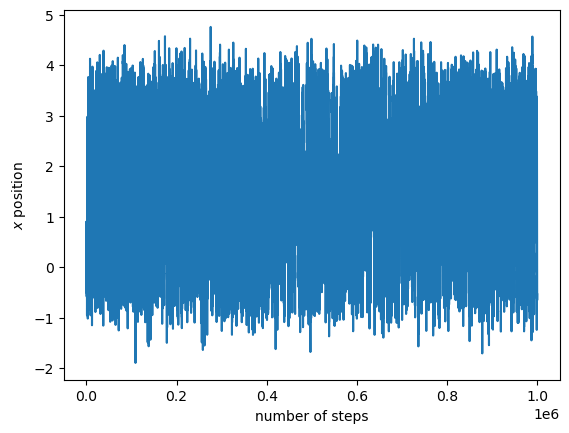

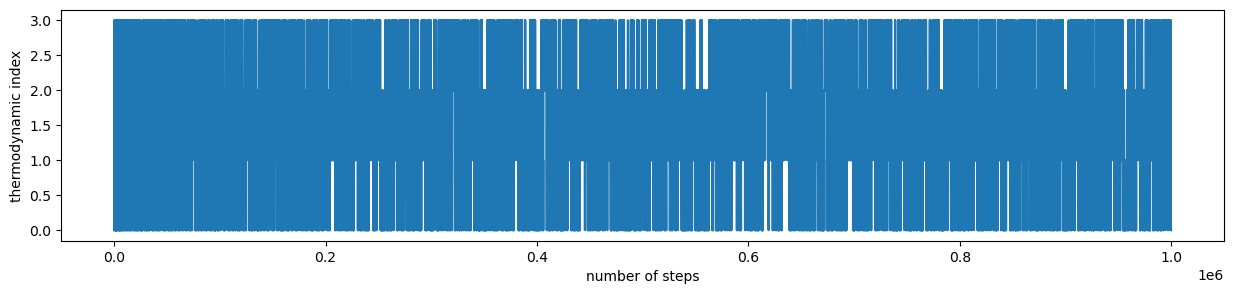

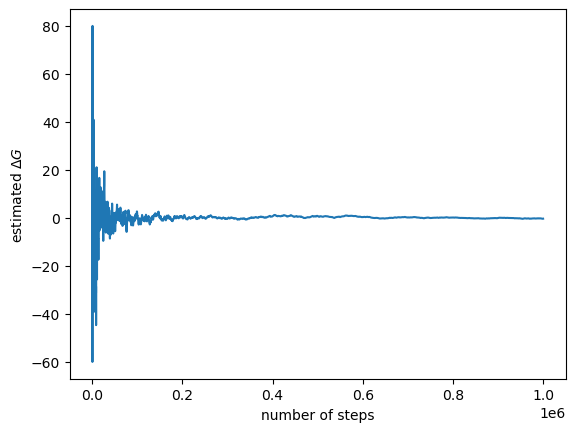

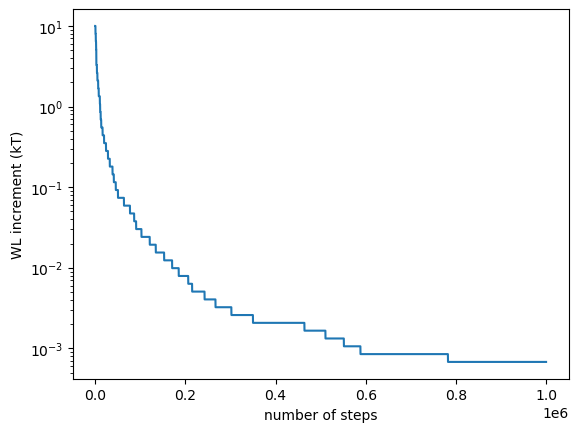

In [106]:
plt.figure()
plt.plot(step_traj, x_traj)
plt.xlabel('number of steps')
plt.ylabel('$x$ position')

plt.figure(figsize=(15,3))
plt.plot(step_traj, i_traj)
plt.xlabel('number of steps')
plt.ylabel('thermodynamic index')

plt.figure()
plt.plot(step_traj, free_energy_traj)
plt.xlabel('number of steps')
plt.ylabel('estimated $\Delta G$')

plt.figure()
plt.plot(step_traj, wl_increment_traj)
plt.yscale('log')
plt.xlabel('number of steps')
plt.ylabel('WL increment (kT)')

dhdl_traj.shape (100000, 4)
i_traj [0 0 0 ... 0 0 0]


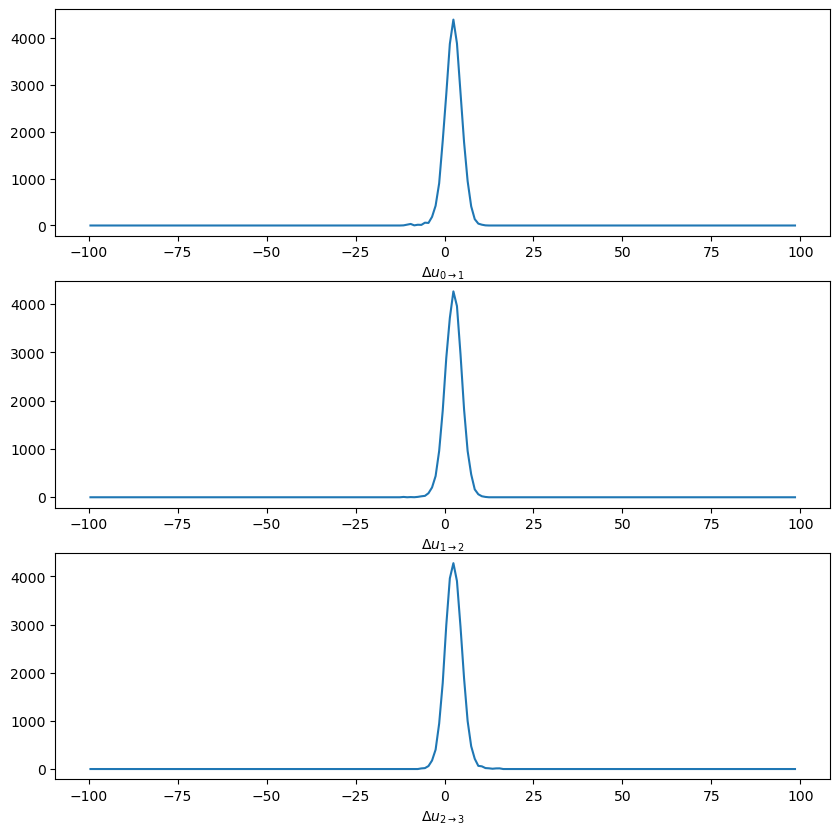

In [250]:
# plot the distribution of the delta_energies 
dhdl_traj = np.array(dhdl_traj)
print('dhdl_traj.shape', dhdl_traj.shape)
i_traj = np.array(i_traj)
print('i_traj', i_traj)

plt.figure(figsize=(10,10))
for j in range(n_ensembles-1):
    
    Ind = (i_traj == j)
    #print('dhdl_traj[Ind,:]', dhdl_traj[Ind,:])
    delta_u = dhdl_traj[Ind, j+1]  # delta_u = (u_{i+1} - u_i) values
    
    delta_u_bins = np.arange(-100., 100., 1.)
    counts, bin_edges = np.histogram(delta_u, bins=delta_u_bins)
    bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2.0
    
    # Estimate \Delta F as < exp(-\Delta u) >
    #dF_estimate = 
    
    plt.subplot(n_ensembles-1, 1, j+1)
    plt.plot(bin_centers, counts)
    plt.xlabel('$\Delta u_{%d \\rightarrow %d}$'%(j,j+1))
    


In [469]:
print(acceptance)

[[0.8626 0.1386 0.     0.    ]
 [0.1374 0.7244 0.1386 0.    ]
 [0.     0.137  0.722  0.1376]
 [0.     0.     0.1393 0.8624]]


In [727]:
def Toeplitz_eigensolver(T):
    eigenvalues = np.zeros(shape=T.shape[0])
    eigenvectors = np.zeros(shape=T.shape)
    H = len(eigenvalues)-1
    states = len(eigenvalues)
    even = False
    if H % 2 == 0:
        even = True
    for k,row in enumerate(T):
        if k==0:
            c = row[k+1]
            alpha = -c
            b= 1-2*c
            a = c
        elif k==len(T)-1:
            a = row[k-1]
            b=1-2*a
            c = a
        else:
            a = T[k][k-1]
            c = row[k+1]
            b = row[k]
            
        # Solve for the Eigenvalues
        if even:
            print('even')
            if k == H:
                lambda_k = 1
            elif k < H/2:
                theta_k = (k+1)*np.pi/(H+1)
                lambda_k = b - 2*np.sqrt(a*c) * np.cos(theta_k)
            elif k >= H/2 and k != H:
                theta_k = (2*k+2-H)*np.pi/(2*(H+1))
                lambda_k = b + 2*np.sqrt(a*c) * np.cos(theta_k)
            eigenvalues[k,k] += lambda_k
        else:
            if k == H:
                lambda_k = 1
            elif k <= (H-3)/2:
                theta_k = (k+1)*np.pi/(H+1)
                lambda_k = b - 2*np.sqrt(a*c) * np.cos(theta_k)
            elif k > (H-3)/2 and k < H-1:
                theta_k = (2*k+2-H)*np.pi/(2*(H+1))
                lambda_k = b + 2*np.sqrt(a*c) * np.cos(theta_k)
            elif k == H-1:
                lambda_k = b
            eigenvalues[k] += lambda_k
        # Now Let's do the Eigenvectors
        if k == H:
            for j in range(H+1):
                eigenvectors[j,k]= 1
        else:
            for j in range(H+1):
                j=j+1
                if j == 1:
                    eigenvectors[j-1,k] = a**(H/2) * c**((H+2)/2) * ( a* np.sin((H+2)*theta_k) + (1-c-lambda_k)*np.sin(theta_k*H))
                    continue
                elif j % 2 == 0:
                    eigenvectors[j-1,k] = -a**((H+j)/2) * c**((H-j+2)/2) * ( (1-a-lambda_k) * np.sin((H-j+2) * theta_k) +  c*np.sin(theta_k*(H-j)))
                    continue
                elif j % 2 != 0:
                    eigenvectors[j-1,k] = a**((H+j-1)/2) * c**((H-j+3)/2) * ( a * np.sin((H-j+3) * theta_k) + (1-c-lambda_k)*np.sin(theta_k*(H-j+1)))
                    continue
    return eigenvalues,eigenvectors


In [728]:
lam, u = Toeplitz_eigensolver(acceptance)

In [729]:
for i in range(len(u)):
    u0 = u[:,i]
    print(np.sum(lam[i]*u0 - np.dot(acceptance,u0)))

1.2347863977856715e-08
-1.8697883200033206e-06
-2.498150882629247e-05
9.999999999998899e-05


This is essentially numerical zero. No lets use an eigensolver and compare results

In [545]:
eigenvalues,eigenvectors = np.linalg.eig(acceptance)

In [730]:
for i in range(len(eigenvectors)):
    u0 = eigenvectors[:,i]
    print(np.sum(eigenvalues[i]*u0 - np.dot(acceptance,u0)))

2.220446049250313e-16
-4.440892098500626e-16
-7.771561172376096e-16
-4.996003610813204e-16


This decomposition "works" Analytically or numerically. The eigensolver from numpy is a "better" decomposition (closer to 0).

## Calculation of return time

In [687]:
from deeptime.markov.tools.analysis._mean_first_passage_time import *

Lets use deeptime to numerically calculate MFPT

In [731]:
M = np.vstack([mfpt(acceptance,i) for i in range(acceptance.shape[0])])


In [734]:
print('Return Time',(M[0,3]+M[3,0]) *traj_every,'steps')

Return Time 874.4960684007865 steps


In [746]:
def calculate_M(P,lambdas,us):
    M = np.zeros(shape = acceptance.shape)
    for i in range(M.shape[0]):
        for j in range(M.shape[0]):
            if i == j:
                M[j,i] = 0
            else:
                lambda_k_bar = np.nan_to_num((1-lambdas)**(-1),posinf=1)
                M[j,i] = np.sum([lambda_k_bar[k] * (us[k,j]**2 - us[k,i]*us[k,j]) for k in range(0,M.shape[0])])
    return M
M = calculate_M(acceptance,lam,u)*traj_every
print(M)

[[ 0.00000000e+00  9.09348892e-06  3.75850317e-06  5.49041538e-02]
 [ 1.30122249e-06  0.00000000e+00  7.77891965e-07 -1.11604013e-02]
 [-1.90435179e-06  2.90730343e-06  0.00000000e+00  2.72476978e-02]
 [ 5.52320688e+02  5.52254631e+02  5.52293037e+02  0.00000000e+00]]


/home/kpman/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in reciprocal
  


HMMMM my solution doesnt quite work